/tmp/ipykernel_3174/1692886022.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', period='1y', interval='1d')
[*********************100%***********************]  1 of 1 completed


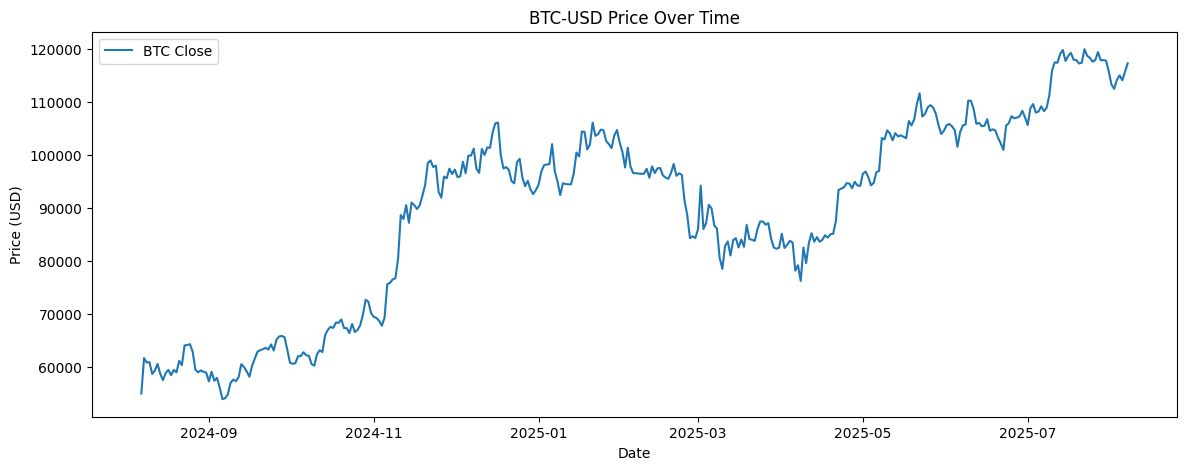

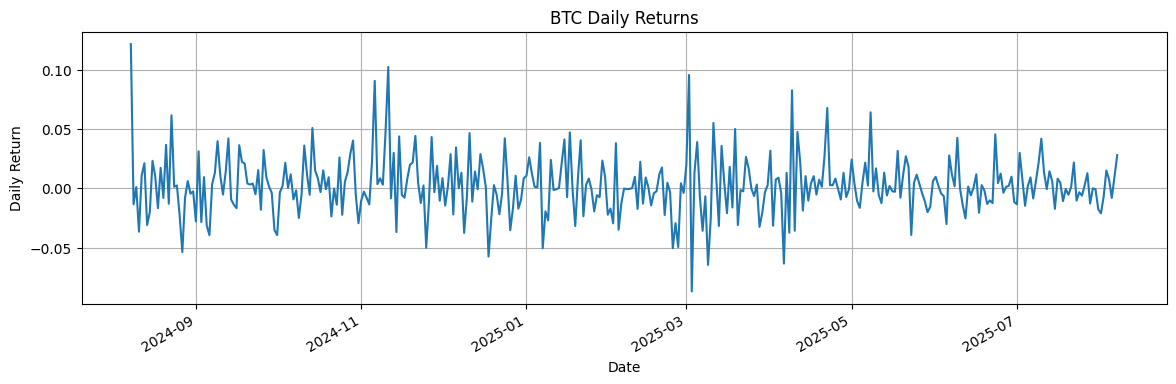

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data
btc = yf.download('BTC-USD', period='1y', interval='1d')
btc['Daily Return'] = btc['Close'].pct_change()

# Plot Closing Price
plt.figure(figsize=(14, 5))
plt.plot(btc['Close'], label='BTC Close')
plt.title('BTC-USD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot Daily Returns
plt.figure(figsize=(14, 4))
btc['Daily Return'].plot()
plt.title('BTC Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid()
plt.show()



we are analyzing Bitcoin (BTC-USD) and Ethereum (ETH-USD) over the last year:



/tmp/ipykernel_3174/3416148837.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


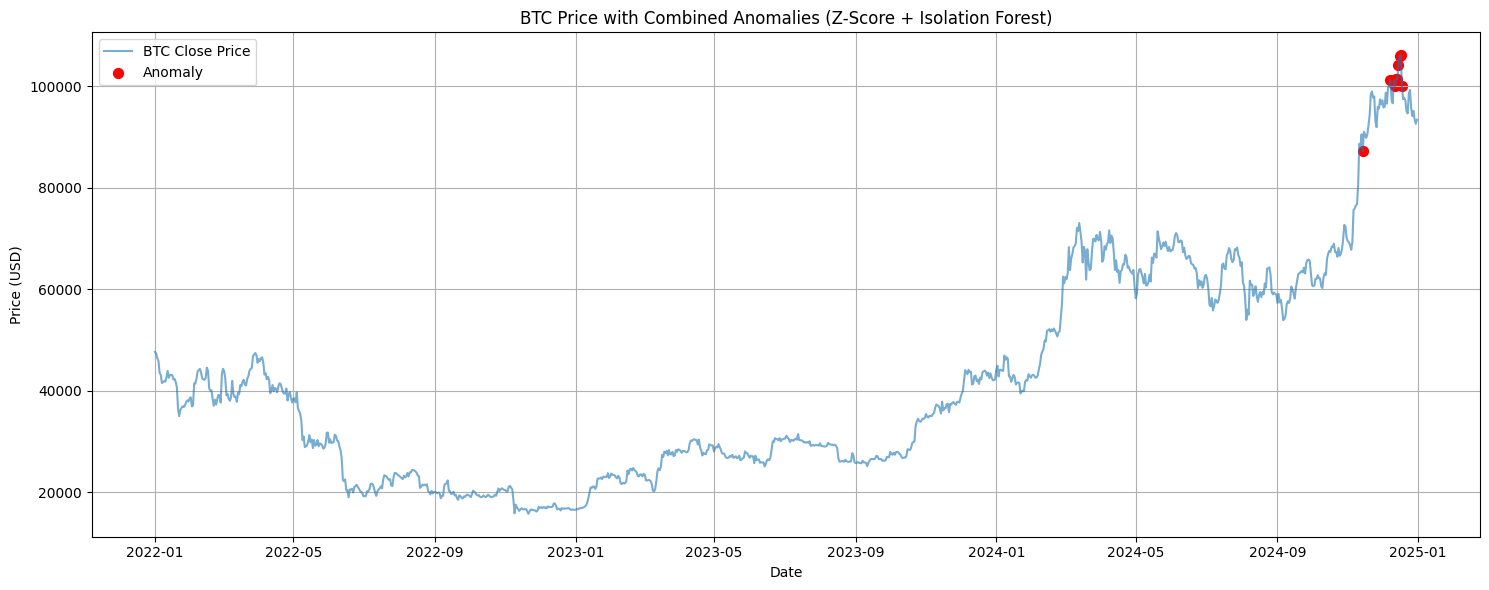

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Download crypto data
btc = yf.download("BTC-USD", start="2022-01-01", end="2025-01-01")
btc = btc[['Close']].dropna()

# Step 2: Calculate Z-scores
btc['z_score'] = (btc['Close'] - btc['Close'].mean()) / btc['Close'].std()
btc['z_anomaly'] = btc['z_score'].abs() > 3

# Step 3: Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
btc['iso_anomaly'] = iso.fit_predict(btc[['Close']])
btc['iso_anomaly'] = btc['iso_anomaly'] == -1  # True if anomaly

# Step 4: Combine both methods
btc['combined_anomaly'] = btc['z_anomaly'] | btc['iso_anomaly']

# Step 5: Visualize results
plt.figure(figsize=(15, 6))
plt.plot(btc.index, btc['Close'], label='BTC Close Price', alpha=0.6)
plt.scatter(btc.index[btc['combined_anomaly']], 
            btc['Close'][btc['combined_anomaly']], 
            color='red', label='Anomaly', s=50)
plt.title('BTC Price with Combined Anomalies (Z-Score + Isolation Forest)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




